# Timestamp Check

In [65]:
import os
import json
import re
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import random
import pandas as pd
import math

In [2]:
folder_count = len(os.listdir("./Images"))

Going to show images from 34 to 38


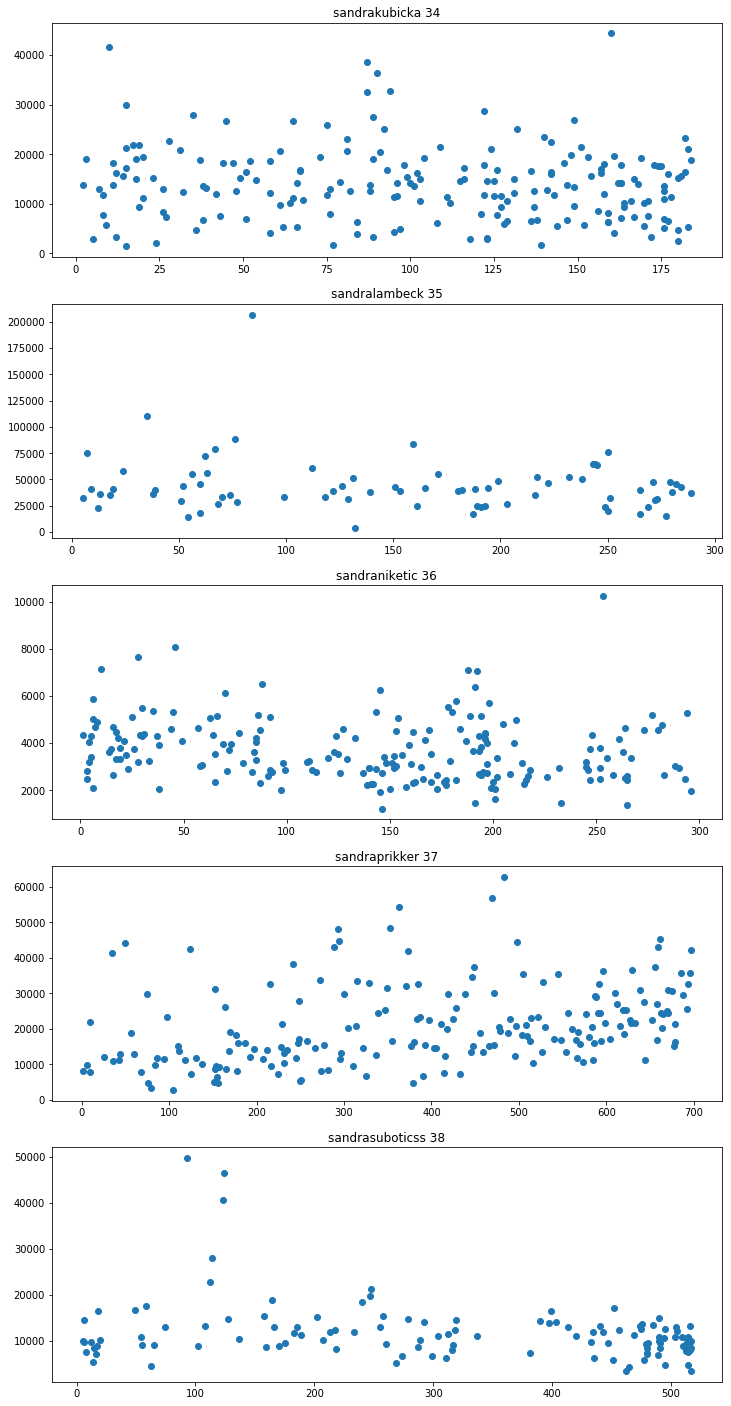

In [5]:
index_stop = random.randint(6,folder_count-1)
images_num_to_show = 5
print(f"Going to show images from {index_stop-images_num_to_show} to {index_stop-1}")
fig, axs = plt.subplots(images_num_to_show)
fig.subplots_adjust(hspace=0.2)
fig.set_figheight(25)
fig.set_figwidth(12)
index_count = 0
for index,folder_name in enumerate(os.listdir("./Images")):
    file = open(f"./Images/{folder_name}/{folder_name}.json",encoding="utf8")
    data = json.load(file)
    images = []
    likes = []
    days_count = []
    pattern = re.compile(r'\d+_\d+_\d+_n.jpg')
    for item in data["GraphImages"]:
        finds = re.search(pattern,item["display_url"])
        images.append(finds[0])
        likes.append(item["edge_media_preview_like"]["count"])
        date_post = datetime.fromtimestamp(item["taken_at_timestamp"])
        days_count.append((datetime.today() - date_post).days)
    maxLikes = max(likes)
    if index < index_stop and index >= (index_stop - images_num_to_show):
        axs[index_count].scatter(days_count,likes)
        axs[index_count].set_title(f"{folder_name} {index}")
        index_count += 1
    if index_count == images_num_to_show:
        break

In [158]:
folders = os.listdir("./Images")

In [159]:
random_folder = folders[random.randint(0,folder_count)]

In [160]:
random_folder

'florencepugh'

In [161]:
file = open(f"./Images/{random_folder}/{random_folder}.json",encoding="utf8")
data = json.load(file)
images = []
likes = []
days_count = []
datetimes = []
pattern = re.compile(r'\d+_\d+_\d+_n.jpg')
for item in data["GraphImages"]:
    finds = re.search(pattern,item["display_url"])
    images.append(finds[0])
    likes.append(item["edge_media_preview_like"]["count"])
    date_post = datetime.fromtimestamp(item["taken_at_timestamp"])
    datetimes.append(date_post)
    days_count.append((datetime.today() - date_post).days)
maxLikes = max(likes)

In [162]:
df = pd.DataFrame(datetimes,columns=["Datetime"])
df["Likes"]=likes
df["Days Passed"] = days_count
df = df.set_index("Datetime")

In [163]:
df.head()

,Likes,Days Passed
Datetime,,
2021-02-05 19:59:36,153862,2
2021-02-02 23:22:24,404788,5
2021-02-02 01:12:31,162083,5
2021-01-13 19:27:58,135635,25
2021-01-11 21:33:32,162646,27


In [164]:
df["Days Between Posts"] = df["Days Passed"] - df["Days Passed"].shift(1)

In [165]:
df["Days Between Posts"].isna().sum()

1

In [166]:
df["Days Between Posts"] = df["Days Between Posts"].fillna(math.floor(df["Days Between Posts"].median()))

In [167]:
df.head()

,Likes,Days Passed,Days Between Posts
Datetime,,,
2021-02-05 19:59:36,153862,2,2.0
2021-02-02 23:22:24,404788,5,3.0
2021-02-02 01:12:31,162083,5,0.0
2021-01-13 19:27:58,135635,25,20.0
2021-01-11 21:33:32,162646,27,2.0


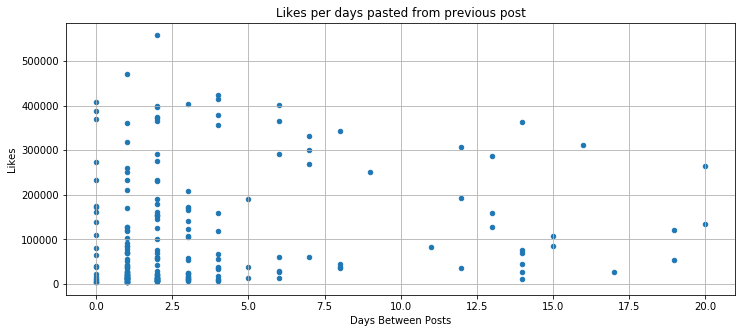

In [168]:
df.plot.scatter("Days Between Posts","Likes",figsize=(12,5),title="Likes per days pasted from previous post",grid=True);

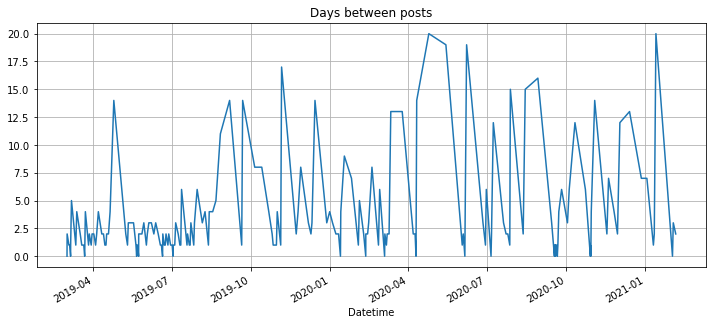

In [169]:
df["Days Between Posts"].plot(figsize=(12,5),grid=True,title="Days between posts");

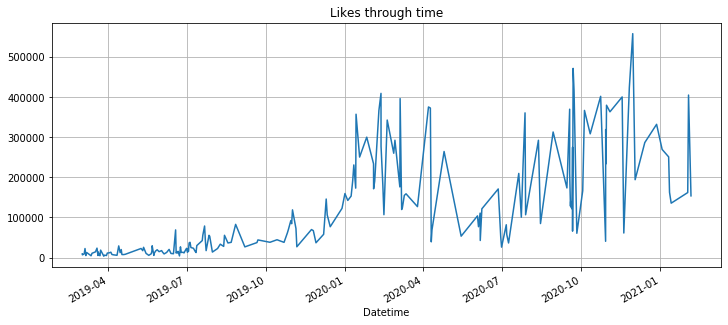

In [170]:
df["Likes"].plot(figsize=(12,5),grid=True,title="Likes through time");

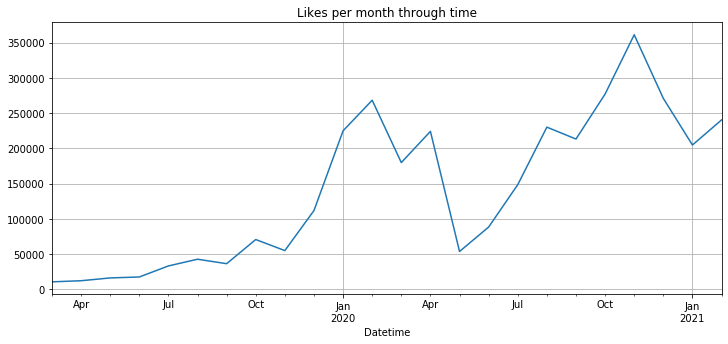

In [171]:
df["Likes"].resample("M").mean().plot(figsize=(12,5),grid=True,title="Likes per month through time")

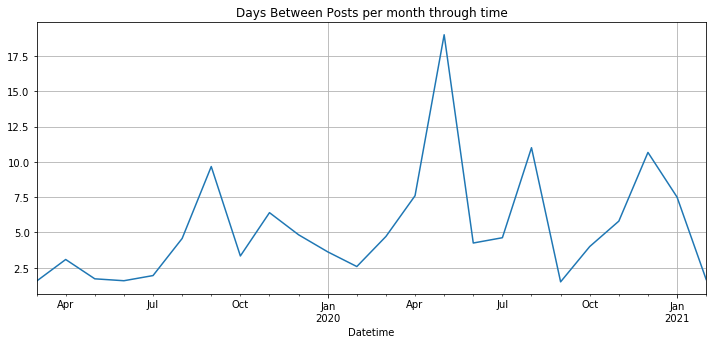

In [172]:
df["Days Between Posts"].resample("M").mean().plot(figsize=(12,5),grid=True,title="Days Between Posts per month through time")

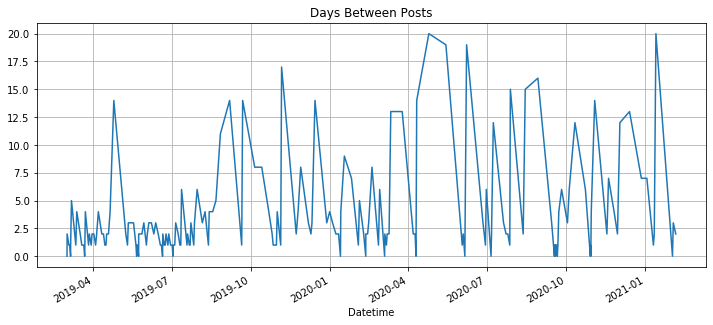

In [174]:
df["Days Between Posts"].plot(figsize=(12,5),grid=True,title="Days Between Posts")

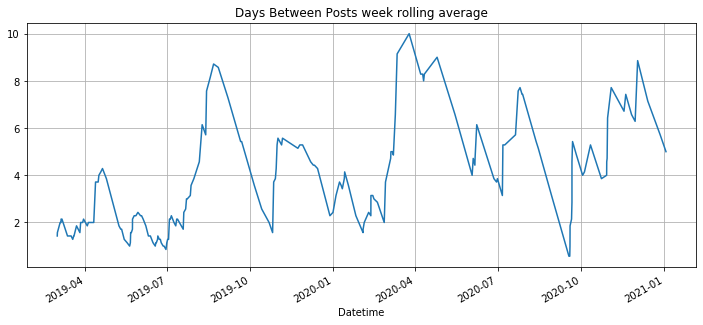

In [185]:
df["Days Between Posts"].rolling(7).mean().plot(figsize=(12,5),grid=True,title="Days Between Posts week rolling average")

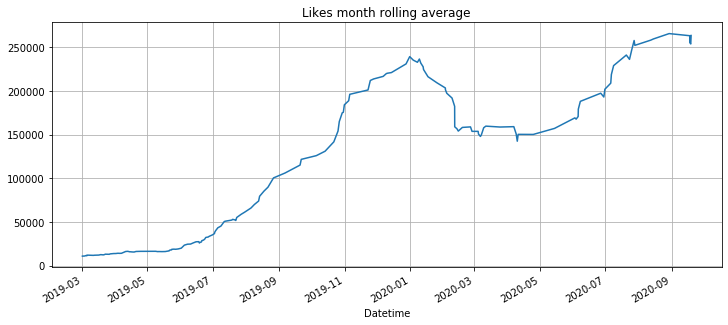

In [187]:
df["Likes"].rolling(30).mean().plot(figsize=(12,5),grid=True,title="Likes month rolling average")